# Heatmap

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None

In [2]:
# Import Data

df1 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_06_07.csv')
df2 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_07_08.csv')
df3 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_08_09.csv')
df4 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_09_10.csv')
df5 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_10_11.csv')
df6 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_11_12.csv')
df7 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_12_13.csv')
df8 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_13_14.csv')
df9 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_14_15.csv')
df10 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_15_16.csv')
df11 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_16_17.csv')
df12 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_17_18.csv')
df13 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_18_19.csv')
df14 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_19_20.csv')
df15 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_20_21.csv')
df16 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_21_22.csv')
df17 = pd.read_csv('D:\GitHub\Premier-League-Streamlit-Web-App\History Matches\epl_22_23.csv')

In [3]:
# Merge dataset
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], ignore_index=True)

In [4]:
df.head()

,date,season,venue,home_team,away_team,ht_home_score,ht_away_score,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,referee
0,19/08/2006,06/07,"Bramall Lane, Sheffield",Sheffield United,Liverpool,0,0,1,1,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,Rob Styles
1,19/08/2006,06/07,"Fratton Park, Portsmouth",Portsmouth,Blackburn Rovers,1,0,3,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,Alan Wiley
2,19/08/2006,06/07,"Goodison Park, Liverpool",Everton,Watford,1,0,2,1,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,Peter Walton
3,19/08/2006,06/07,"Sports Direct Arena, Newcastle",Newcastle United,Wigan Athletic,1,0,2,1,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,Martin Atkinson
4,19/08/2006,06/07,"Madejski Stadium, Reading",Reading,Middlesbrough,2,2,3,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,Mark Halsey


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  6404 non-null   object 
 1   season                6404 non-null   object 
 2   venue                 6404 non-null   object 
 3   home_team             6404 non-null   object 
 4   away_team             6404 non-null   object 
 5   ht_home_score         6404 non-null   int64  
 6   ht_away_score         6404 non-null   int64  
 7   home_score            6404 non-null   int64  
 8   away_score            6404 non-null   int64  
 9   home_possession_%     6404 non-null   float64
 10  away_possession_%     6404 non-null   float64
 11  home_shots_on_target  6404 non-null   int64  
 12  away_shots_on_target  6404 non-null   int64  
 13  home_shots            6404 non-null   int64  
 14  away_shots            6404 non-null   int64  
 15  home_touches         

## Data Cleaning

In [6]:
df.drop(['date', 'season', 'venue', 'referee'], axis=1, inplace=True)
df.head()

,home_team,away_team,ht_home_score,ht_away_score,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls
0,Sheffield United,Liverpool,0,0,1,1,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17
1,Portsmouth,Blackburn Rovers,1,0,3,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17
2,Everton,Watford,1,0,2,1,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15
3,Newcastle United,Wigan Athletic,1,0,2,1,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19
4,Reading,Middlesbrough,2,2,3,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16


## Data Manipulation

In [7]:
df['result'] = 'D' 
df.loc[df['home_score'] > df['away_score'], 'result'] = 'W'  
df.loc[df['home_score'] < df['away_score'], 'result'] = 'L'  

In [8]:
df.drop(['home_score', 'away_score'], axis=1, inplace=True)
df.head()

,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,result
0,Sheffield United,Liverpool,0,0,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,D
1,Portsmouth,Blackburn Rovers,1,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,W
2,Everton,Watford,1,0,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,W
3,Newcastle United,Wigan Athletic,1,0,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,W
4,Reading,Middlesbrough,2,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,W


In [9]:
df['home_team'].unique()

array(['Sheffield United', 'Portsmouth', 'Everton', 'Newcastle United',
       'Reading', 'West Ham', 'Arsenal', 'Bolton Wanderers', 'Chelsea',
       'Manchester United', 'Watford', 'Tottenham', 'Aston Villa',
       'Blackburn Rovers', 'Charlton Athletic', 'Fulham', 'Middlesbrough',
       'Man City', 'Wigan Athletic', 'Liverpool', 'Derby County',
       'Sunderland', 'Birmingham City', 'Hull City', 'Stoke', 'West Brom',
       'Burnley', 'Wolverhampton Wanderers', 'Blackpool',
       'Queens Park Rangers', 'Swansea', 'Norwich City', 'Southampton',
       'Crystal Palace', 'Cardiff City', 'Leicester', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Leeds', 'Brentford',
       'Manchester City', 'Nottingham Forest'], dtype=object)

## Box Plot

In [10]:
# Fungsi untuk plotting boxplot
def plot_box(data, labels, title, figsize=(12, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)  # Mengatur ukuran figure
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)
    plt.show()

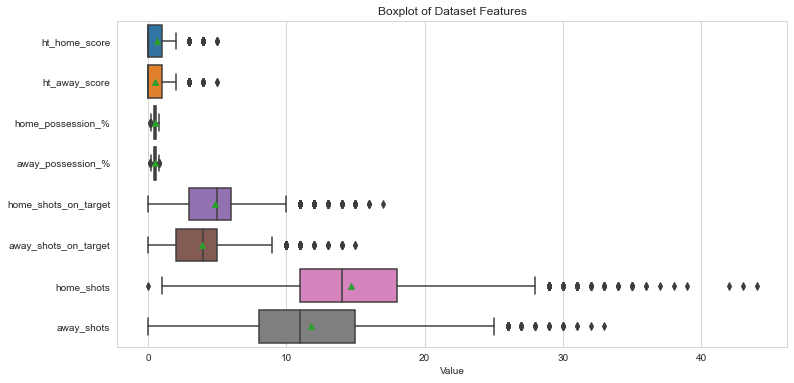

In [11]:
plot_box(data = df.iloc[:,2:10],
         labels = df.iloc[:, 2:10].columns.tolist(),
         title='Boxplot of Dataset Features')

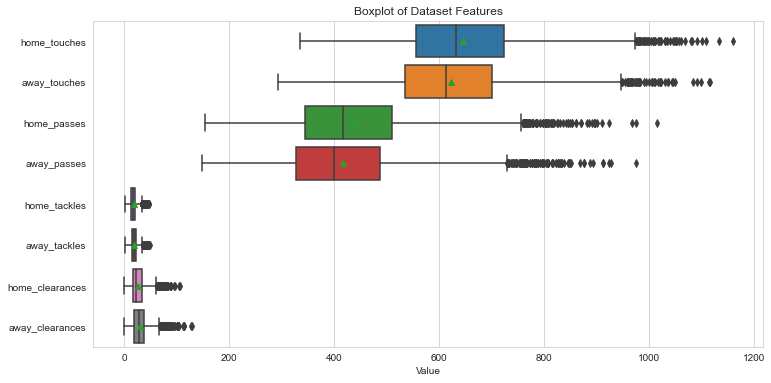

In [12]:
plot_box(data = df.iloc[:,10:18],
         labels = df.iloc[:, 10:18].columns.tolist(),
         title='Boxplot of Dataset Features')

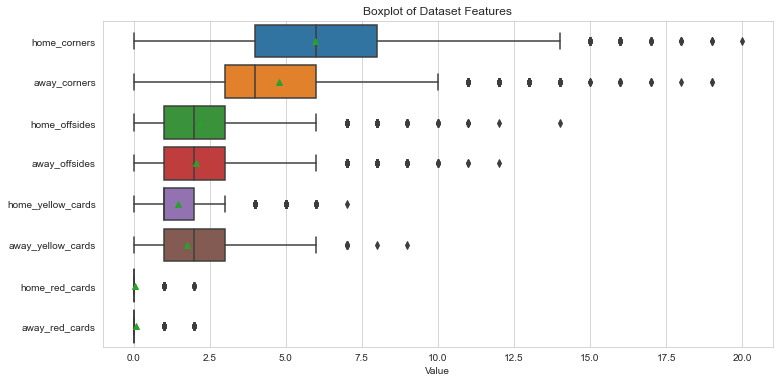

In [13]:
plot_box(data = df.iloc[:, 18:26],
         labels = df.iloc[:, 18:26].columns.tolist(),
         title='Boxplot of Dataset Features')

## Distribusi Data

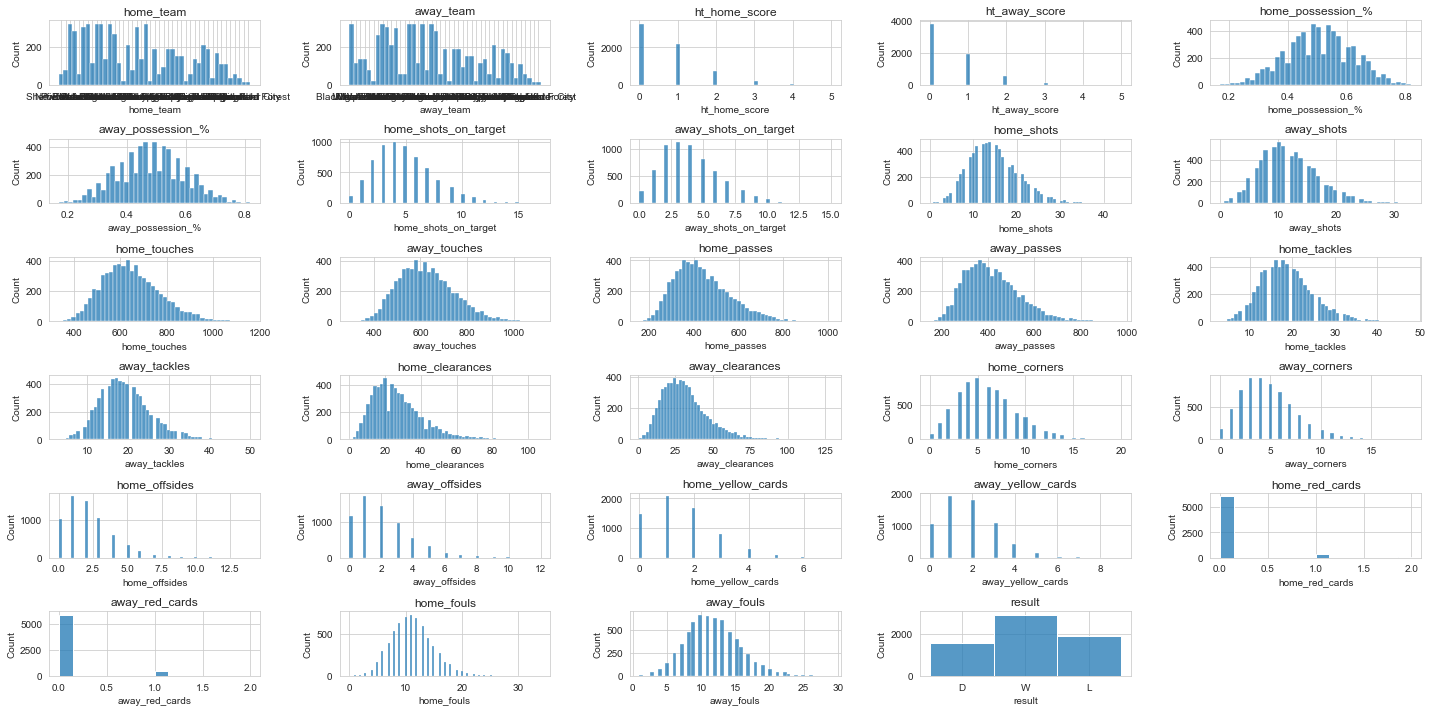

In [14]:
data = df.iloc[:, :]

rows = 6
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

# Melakukan flatten pada axes supaya mempermudah iterasi
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(data.columns):
        sns.histplot(data=data, x=data.columns[i], ax=ax)
        ax.set_title(data.columns[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

## Encoding

In [15]:
df['result'].unique()

array(['D', 'W', 'L'], dtype=object)

In [16]:
df['home_team'].unique()

array(['Sheffield United', 'Portsmouth', 'Everton', 'Newcastle United',
       'Reading', 'West Ham', 'Arsenal', 'Bolton Wanderers', 'Chelsea',
       'Manchester United', 'Watford', 'Tottenham', 'Aston Villa',
       'Blackburn Rovers', 'Charlton Athletic', 'Fulham', 'Middlesbrough',
       'Man City', 'Wigan Athletic', 'Liverpool', 'Derby County',
       'Sunderland', 'Birmingham City', 'Hull City', 'Stoke', 'West Brom',
       'Burnley', 'Wolverhampton Wanderers', 'Blackpool',
       'Queens Park Rangers', 'Swansea', 'Norwich City', 'Southampton',
       'Crystal Palace', 'Cardiff City', 'Leicester', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Leeds', 'Brentford',
       'Manchester City', 'Nottingham Forest'], dtype=object)

In [17]:
df['away_team'].unique()

array(['Liverpool', 'Blackburn Rovers', 'Watford', 'Wigan Athletic',
       'Middlesbrough', 'Charlton Athletic', 'Aston Villa', 'Tottenham',
       'Man City', 'Fulham', 'West Ham', 'Sheffield United', 'Reading',
       'Everton', 'Manchester United', 'Bolton Wanderers', 'Chelsea',
       'Portsmouth', 'Arsenal', 'Newcastle United', 'Birmingham City',
       'Sunderland', 'Derby County', 'Stoke', 'West Brom', 'Hull City',
       'Wolverhampton Wanderers', 'Burnley', 'Blackpool', 'Norwich City',
       'Swansea', 'Queens Park Rangers', 'Southampton', 'Cardiff City',
       'Crystal Palace', 'Leicester', 'Bournemouth', 'Huddersfield',
       'Brighton', 'Leeds', 'Brentford', 'Nottingham Forest',
       'Manchester City'], dtype=object)

In [18]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # Menggunakan LabelEncoder untuk encoding pada kolom 'home_team'
# df['home_team_encoded'] = le.fit_transform(df['home_team'])

# # Menggunakan LabelEncoder untuk encoding pada kolom 'away_team'
# df['away_team_encoded'] = le.transform(df['away_team'])

# # Tampilkan hasil encoding
# (df[['home_team', 'home_team_encoded', 'away_team', 'away_team_encoded']])


In [19]:
# list((df['home_team'].unique()))

In [20]:

le = LabelEncoder()
df['home_team'] = le.fit_transform(df['home_team'])
df['away_team'] = le.transform(df['away_team'])


ordinal_mapping = {
    'result': {'W':0, 'D':1, 'L':2}
}
df['result'] = df['result'].map(ordinal_mapping['result'])
df

,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,result
0,32,21,0,0,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,1
1,29,3,1,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,0
2,15,38,1,0,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,0
3,26,41,1,0,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,0
4,31,25,2,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6399,23,0,2,0,0.51,0.48,9,2,14,8,621,584,496,457,11,10,8,12,1,3,0,1,3,1,0,0,13,13,0
6400,40,21,1,1,0.27,0.72,2,4,7,20,492,1024,311,850,13,20,13,17,3,6,1,1,0,0,0,0,6,8,2
6401,33,6,0,0,0.56,0.43,2,2,11,16,721,601,501,389,19,21,18,32,6,4,4,2,0,3,0,0,9,11,2
6402,15,26,0,1,0.39,0.60,5,8,13,15,509,671,300,452,18,14,24,14,3,14,3,1,2,1,0,0,8,6,2


## Heatmap

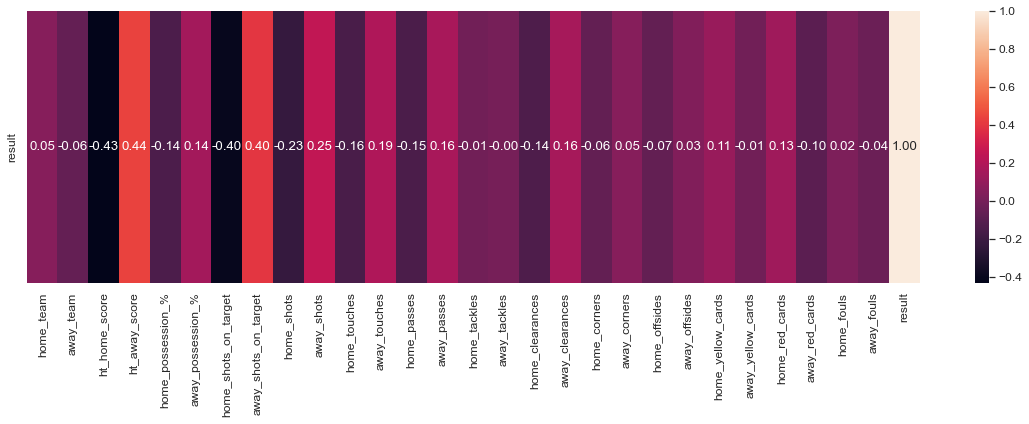

In [21]:
# heatmap correlation
corr = df.corr()

plt.figure(figsize=(20, 5)) 
sns.set(font_scale=1.1)  
sns.heatmap(corr.loc[['result']], annot=True, fmt=".2f")
plt.show()

Korelasi (+) :
- 

## Check Multikolinearitas

In [22]:
X = df[df.iloc[:, 2:28].columns.tolist()]

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
X = add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,ht_home_score,1.315984
2,ht_away_score,1.322641
3,home_possession_%,1393.958652
4,away_possession_%,1402.016562
5,home_shots_on_target,2.246253
6,away_shots_on_target,2.162686
7,home_shots,2.908864
8,away_shots,2.786380
9,home_touches,66.140620
10,away_touches,65.156773


In [23]:
df.head()

,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,result
0,32,21,0,0,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,1
1,29,3,1,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,0
2,15,38,1,0,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,0
3,26,41,1,0,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,0
4,31,25,2,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,0


In [24]:
df.iloc[:, 2:-1].columns

Index(['ht_home_score', 'ht_away_score', 'home_possession_%',
       'away_possession_%', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots', 'away_shots', 'home_touches', 'away_touches',
       'home_passes', 'away_passes', 'home_tackles', 'away_tackles',
       'home_clearances', 'away_clearances', 'home_corners', 'away_corners',
       'home_offsides', 'away_offsides', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_fouls',
       'away_fouls'],
      dtype='object')

## Scaling

In [25]:
scaler = MinMaxScaler()
cols = df.iloc[:, 2:-1].columns
df[cols] = scaler.fit_transform(df[cols])

In [26]:
df.head()

,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,result
0,32,21,0.0,0.0,0.369231,0.630769,0.058824,0.266667,0.136364,0.454545,0.140606,0.334550,0.136047,0.263285,0.422222,0.553191,0.598131,0.296875,0.0,0.631579,0.214286,0.416667,0.142857,0.222222,0.0,0.0,0.352941,0.571429,1
1,29,3,0.2,0.0,0.415385,0.584615,0.647059,0.200000,0.477273,0.242424,0.096970,0.283455,0.144186,0.216184,0.444444,0.340426,0.140187,0.210938,0.3,0.105263,0.357143,0.000000,0.285714,0.000000,0.0,0.5,0.647059,0.571429,0
2,15,38,0.2,0.0,0.446154,0.553846,0.117647,0.466667,0.181818,0.393939,0.151515,0.242092,0.154651,0.208937,0.311111,0.446809,0.570093,0.242188,0.0,0.315789,0.357143,0.083333,0.285714,0.222222,0.0,0.0,0.352941,0.500000,0
3,26,41,0.2,0.0,0.584615,0.415385,0.294118,0.266667,0.181818,0.393939,0.223030,0.187348,0.229070,0.157005,0.533333,0.638298,0.140187,0.117188,0.2,0.578947,0.428571,0.250000,0.142857,0.222222,0.0,0.0,0.529412,0.642857,0
4,31,25,0.4,0.4,0.538462,0.461538,0.470588,0.466667,0.318182,0.333333,0.218182,0.178832,0.209302,0.217391,0.444444,0.531915,0.084112,0.132812,0.4,0.105263,0.000000,0.083333,0.142857,0.333333,0.0,0.0,0.205882,0.535714,0


## Modelling

### Spliting Data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forrest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Hyperparameter Tuning

In [29]:
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [30]:
random_search = RandomizedSearchCV(rfc, param_distributions, n_iter=10, cv=5, error_score='raise')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(n_estimators=1000),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [31]:
rfc_hyper = random_search.best_estimator_
rfc_hyper.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10)

### Evaluation

In [32]:
y_pred_rfc = rfc_hyper.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print(f"Predict. results : {y_pred_rfc}")
print(f"Accuracy : {accuracy_rfc}")

Predict. results : [0 0 0 ... 2 2 0]
Accuracy : 0.6775956284153005


In [33]:
# 'result': {'W':0, 'D':1, 'L':2}

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       596
           1       0.53      0.24      0.33       315
           2       0.66      0.74      0.70       370

    accuracy                           0.68      1281
   macro avg       0.64      0.62      0.60      1281
weighted avg       0.65      0.68      0.65      1281



[[0.40472643 0.31247776 0.28279581]]


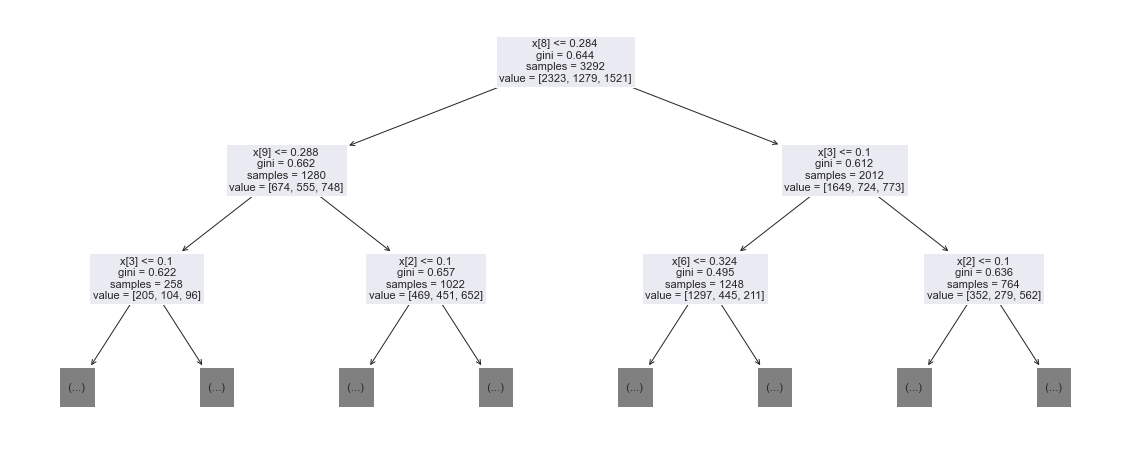

In [51]:
# Plot decision tree pertama di random forest
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(rfc_hyper.estimators_[0], max_depth=2, ax=ax)
# Untuk memvisualisasikan probabilitas kelas di setiap node, gunakan metode `predict_proba` di seluruh random forest
# Misalnya untuk memprediksi probabilitas kelas untuk contoh pertama dalam test set:
probs = rfc_hyper.predict_proba(X_test[:1])
print(probs)

In [35]:
y_pred_proba = rfc_hyper.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.31247776, 0.16820202, 0.29957126, ..., 0.25532029, 0.34232792,
       0.10264778])

Text(0.5, 1.0, 'Confusion Matrix')

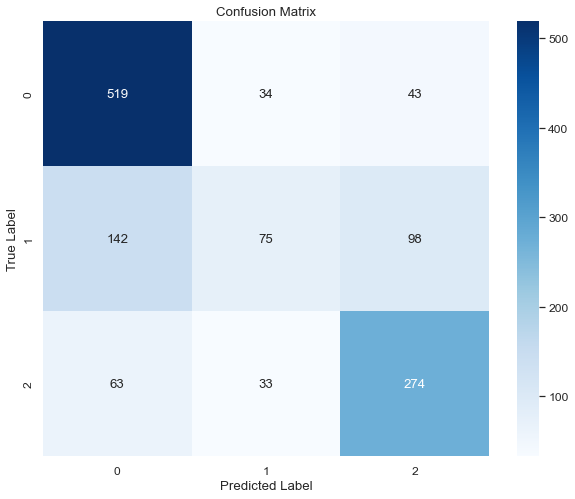

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
# Plot confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

param_dist = {
    'C': uniform(loc=0, scale=4),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

random_search_lr_best = RandomizedSearchCV(model_lr, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search_lr_best.fit(X_train, y_train)

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                multi_class='multinomial'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A7F845A020>,
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [66]:
best_model_lr = random_search_lr_best.best_estimator_
best_model_lr.fit(X_train, y_train)

y_pred_lr_best = best_model_lr.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

print(f"Predict. results : {y_pred_lr_best}")
print(f"Accuracy : {accuracy_lr_best}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_best))

Predict. results : [0 0 0 ... 2 2 0]
Accuracy : 0.6799375487900078
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       596
           1       0.45      0.26      0.33       315
           2       0.66      0.76      0.71       370

    accuracy                           0.68      1281
   macro avg       0.62      0.62      0.61      1281
weighted avg       0.65      0.68      0.66      1281



c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

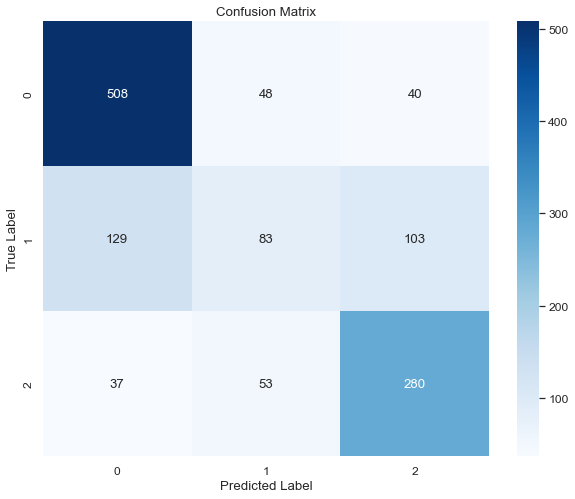

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_lr_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')